In [228]:
import turtle
import numpy as np
import os
import time
import math
from math import pi
import subprocess
from PIL import Image, ImageDraw

In [219]:
def drawLineSegments(segments, img_w=300, img_h=300, draw_size=250):
    minX = (img_w - draw_size)/2
    minY = abs((img_h - draw_size)/2)
    minX = 10
    minY = 10
    
    span = np.max(segments) - np.min(segments)
    ratio = draw_size/span
    shift = -np.min(segments)
    
    shiftX = -float('inf')
    shiftY = -float('inf')
    for segment in segments:
        shiftX = max(shiftX, -float(segment[0][0]), -float(segment[1][0]))
        shiftY = max(shiftY, -float(segment[0][1]), -float(segment[1][1]))
    
    qx = lambda v : (v + shiftX) * ratio + minX
    qy = lambda v : (v + shiftY) * ratio + minY
    
    img = Image.new('RGB', (img_w, img_h), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    for segment in segments:
        draw.line((qx(segment[0][0]), qy(segment[0][1]), qx(segment[1][0]), qy(segment[1][1])), fill=256)
        
    return img

In [220]:
#TODO and reflect: Maybe these lines info shouldn't be hardcoded
def getSegmentsFromFile(file_path):
    file = open(file_path, 'r')
    lines = file.readlines()
    
    n = int(lines[0])
    print('N =', n)
    print(lines[1] + lines[2] + lines[3])
    
    parseLine = lambda ln : [[float(ln.split()[0]), float(ln.split()[1])],\
                             [float(ln.split()[2]), float(ln.split()[3])]]
    segments = [parseLine(ln) for ln in lines[4:]]
    
    return segments

In [221]:
def get_and_draw_from_file(file_name):
    # subprocess.check_call(['./printout_path_greedy_test', '<', file_name, '>', 'temp_file.out'])
    #output = subprocess.check_output(['./printout_path_greedy_test', '<', file_name]).decode('utf-8')
    os.system('./printout_path_greedy_test < ' + file_name + ' > temp_file.out')
    #print('A', output)
    time.sleep(0.5)  # Super hacky please fix this
    ret = drawLineSegments(getSegmentsFromFile('temp_file.out'))
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

N = 11
Planarity: PLANAR
Max degree: 4
Stretch: 3.45837



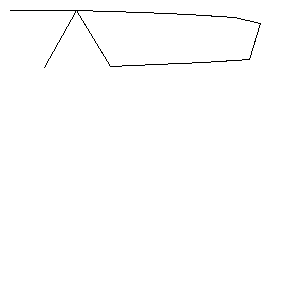

In [342]:
get_and_draw_from_file('../pointsets/hand/013.txt')

In [185]:
# possible keyword: crust, beta skeleton
#Nina amenta
#bern

# reminder: check if convex problem is NP HARD

#david eppstein

### Counter-example finder
This section is just full of little things for me to find a counter-example

In [300]:
# Rotate point P around pivot A by angle theta
def point_rotation(P, A, theta):
    sin_t = np.sin(theta)
    cos_t = np.cos(theta)
    
    NP = A - P
    NP = np.array([NP[0] * cos_t - NP[1] * sin_t, NP[0] * sin_t + NP[1] * cos_t])
    NP = NP + P
    return NP

# distance between two points
def point_dist(A, B):
    return np.sqrt(np.sum((B-A)**2))

In [195]:
# Original version
V = np.array([0., 0.])
C = np.array([-0.5, sqrt(3)/2])
D = np.array([-1., 0.])
B = np.array([0.5, sqrt(3)/2])
#A = np.array([0.999, 0.04471017781])
#A = np.array([1., 0.])

In [331]:
# Scaled version
V = np.array([0., 0.])
C = np.array([-50., 100*sqrt(3)/2])
D = np.array([-100., 0.])
B = np.array([50., 100*sqrt(3)/2])

In [306]:
def get_next_A(a, v, angle=0.01, scale=0.7):
    vprime = 2*a - v
    diff = (vprime-a)
    lendiff = np.sqrt(np.sum(diff**2))
    if (lendiff > scale):
        diff /= lendiff
        diff *= scale
        vprime = a + diff
    return point_rotation(a, vprime, angle)

In [333]:
# This is important if I want to not depend on the sort for distances
# It's easier to define the points in "nice" locations and then rotate
C = point_rotation(V, C, -0.01)
B = point_rotation(V, B, -0.015)

In [308]:
# Original version
A = get_next_A(V, D, angle=0.04, scale=1.0)
A1 = get_next_A(A, V)
A2 = get_next_A(A1, A)
A3 = get_next_A(A2, A1, angle=pi/18, scale=0.4)

In [334]:
# Scaled version
A = get_next_A(V, D, angle=0.04, scale=100.0)
A1 = get_next_A(A, V, scale=70.)
A2 = get_next_A(A1, A, scale=70.)
A3 = get_next_A(A2, A1, angle=pi/18, scale=40.)

In [335]:
# Original version
T = -0.01
B1 = get_next_A(B, C, angle=T, scale=0.7)
B2 = get_next_A(B1, B, angle=T, scale=0.8)
B3 = get_next_A(B2, B1, angle=T, scale=0.9)

In [336]:
# Scaled version
T = -0.01
B1 = get_next_A(B, C, angle=T, scale=70.)
B2 = get_next_A(B1, B, angle=T, scale=80.)
B3 = get_next_A(B2, B1, angle=T, scale=90.)

Convex hull


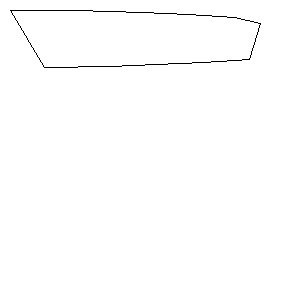

In [337]:
print('Convex hull')
drawLineSegments([
    [B3, A3],
    [B3, B2], [B2, B1], [B1, B],
    [A3, A2], [A2, A1], [A1, A],
    [A, V], [B, C],
    [C, D], [V, D]])

In [339]:
# printing all points
#all_points = [V, C, D, A, A1, A2, A3, B, B1, B2, B3]
all_points = [C, D, A3, B3, A2, B2, A1, B1, A, B, V]
print(len(all_points))
for p in all_points:
    print(p[0], p[1])

11
-48.25806499350447 87.58515378237739
-100.0 0.0
278.6114863027456 20.99050464871304
262.3556062275327 75.61730109106234
239.70656668920972 11.694955721172022
192.46145454090077 79.46536034295708
169.83252889374543 7.497475267610899
122.53231758155182 82.6142973255933
99.9200106660978 3.998933418663416
52.57518820490763 85.06379714789684
0.0 0.0


In [313]:
def angle_between(A, P, B):
    ap = np.sqrt(np.sum((A-P)**2))
    pb = np.sqrt(np.sum((B-P)**2))
    return math.acos(np.dot((A-P), (B-P))/(ap*pb))

In [314]:
def check_collinearity(points):
    for a in range(len(points)):
        for b in range(len(points)):
            for c in range(len(points)):
                if (a == b or b == c or a == c):
                    continue
                if (abs(angle_between(points[a], points[b], points[c])-pi)<0.000001):
                    return True
    return False

In [315]:
print('Are there three collinear points?')
check_collinearity(all_points)

Are there three collinear points?


False

In [316]:
def cross(A, B, C):
    return ((A-B)[0]*(C-B)[1] - (A-B)[1]*(C-B)[0])

In [317]:
def verify_hull(points, eps=0.001):
    N = len(points)
    for i in range(N):
        if (cross(points[i], points[(i+1)%N], points[(i+2)%N]) < eps):
            return False
    return True

In [318]:
cross(C, B, B1)

0.007090616762504064

In [319]:
verify_hull([V, D, C, B, B1, B2, B3, A3, A2, A1, A])

True

In [320]:
# yet another sanity check
ang_sum = 0.0
ppp = [V, D, C, B, B1, B2, B3, A3, A2, A1, A]
for i in range(len(ppp)):
    ang_sum += angle_between(ppp[i], ppp[(i+1)%11], ppp[(i+2)%11])

print('angle (V, D, C)    =', angle_between(V, D, C))
print('angle (D, C, B)    =', angle_between(D, C, B))
print('angle (C, B, B1)   =', angle_between(C, B, B1))
print('angle (B, B1, B2)  =', angle_between(B, B1, B2))
print('angle (B1, B2, B3) =', angle_between(B1, B2, B3))
print('angle (B2, B3, A3) =', angle_between(B2, B3, A3))
print('angle (B3, A3, A2) =', angle_between(B3, A3, A2))
print('angle (A3, A2, A1) =', angle_between(A3, A2, A1))
print('angle (A2, A1, A)  =', angle_between(A2, A1, A))
print('angle (A1, A, V)   =', angle_between(A1, A, V))
print('angle (A, V, D)    =', angle_between(A, V, D))

print('actual angle sum   = ', ang_sum)
print('expected angle sum = ', (len(all_points)-2)*pi)

angle (V, D, C)    = 1.0321975511965977
angle (D, C, B)    = 2.0718951023931953
angle (C, B, B1)   = 3.131592653589803
angle (B, B1, B2)  = 3.131592653589792
angle (B1, B2, B3) = 3.131592653589792
angle (B2, B3, A3) = 1.9254153820011075
angle (B3, A3, A2) = 1.5182101967881185
angle (A3, A2, A1) = 2.9670597283903595
angle (A2, A1, A)  = 3.131592653589792
angle (A1, A, V)   = 3.131592653589803
angle (A, V, D)    = 3.1015926535897926
actual angle sum   =  28.274333882308152
expected angle sum =  28.274333882308138


In [321]:
point_dist(A2, B2)

0.7984576409368045

In [322]:
point_dist(A3, B3)

0.5339288642043186

In [323]:
point_dist(B3, B2)

0.7000000000000004

In [330]:
point_dist(A, A1)

0.7

### Another counter-example
This is the part where I try to build a graph that is not planar

In [388]:
# reflect around the Y axis
def refY(P):
    return P * [-1, 1]

In [389]:
A = np.array([100., 0])
B = np.array([50., 100*sqrt(3)/2])
C = refY(B)
D = refY(A)

In [390]:
# Scaled version
A1 = get_next_A(A, np.array([0.0, 0.0]), scale=70.)
A2 = get_next_A(A1, A, scale=70.)
A3 = get_next_A(A2, A1, angle=pi/18, scale=50.)

In [391]:
# Scaled version
T = -0.01
B1 = get_next_A(B, C, angle=T, scale=70.)
B2 = get_next_A(B1, B, angle=T, scale=80.)
B3 = get_next_A(B2, B1, angle=T, scale=90.)

In [392]:
# Reflect points
C1 = refY(B1)
C2 = refY(B2)
C3 = refY(B3)
D1 = refY(A1)
D2 = refY(A2)
D3 = refY(A3)

Interesting parts


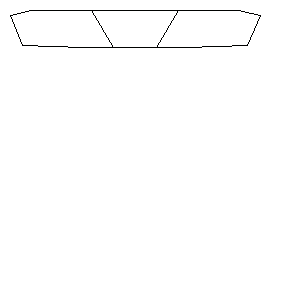

In [393]:
print('Interesting parts')
drawLineSegments([
    [A, A1], [A1, A2], [A2, A3],
    [B, B1], [B1, B2], [B2, B3], [B3, A3],
    [C, C1], [C1, C2], [C2, C3], [C3, D3],
    [D, D1], [D1, D2], [D2, D3],
    [A, B],
    [C, D],
    [B, C],
    [D, A]])

In [394]:
verify_hull([D, D1, D2, D3, C3, C2, C1, C, B, B1, B2, B3, A3, A2, A1, A])

True

In [402]:
# important path sum
point_dist(B, B1) +\
point_dist(B1, B2) +\
point_dist(B2, B3) +\
point_dist(B3, A3) +\
point_dist(A3, A2) +\
point_dist(A2, A1) +\
point_dist(A, A1)

476.39249164490377

In [396]:
# printing all points
all_points = [A, D1, D2, D3, C3, C2, C1, C, B, B1, B2, B3, A3, A2, A1, A]
print(len(all_points))
for p in all_points:
    print(p[0], p[1])

16
-100.0 0.0
-169.99650002916655 0.6999883333916666
-239.98250049582697 2.099895001924982
-289.0394037958189 11.765309561851858
-259.9510028582562 82.40296036234417
-189.98250049582703 84.50264537651887
-119.99650002916657 85.90255204505219
-50.0 86.60254037844386
50.0 86.60254037844386
119.99650002916657 85.90255204505219
189.98250049582703 84.50264537651887
259.9510028582562 82.40296036234417
289.0394037958189 11.765309561851858
239.98250049582697 2.099895001924982
169.99650002916655 0.6999883333916666
100.0 0.0


N = 16
Planarity: PLANAR
Max degree: 2
Stretch: 4.76392



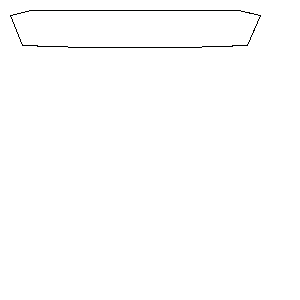

In [397]:
get_and_draw_from_file('../pointsets/hand/016.txt')